In [1]:
!conda list

# packages in environment at /opt/conda:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                  2_kmp_llvm    conda-forge
_r-mutex                  1.0.1               anacondar_1    conda-forge
alembic                   1.8.0              pyhd8ed1ab_0    conda-forge
altair                    4.2.0              pyhd8ed1ab_1    conda-forge
anyio                     3.6.1           py310hff52083_0    conda-forge
aom                       3.3.0                h27087fc_1    conda-forge
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0          py310h5764c6d_2    conda-forge
asttokens                 2.0.5              pyhd8ed1ab_0    conda-forge
async_generator           1.10                       py_0    conda-forge
attrs                     21.4.0             pyhd8ed1ab_0    conda-forge
babel         

In [2]:
!env

SHELL=/bin/bash
PYTHONUNBUFFERED=1
R_HOME=/opt/conda/lib/R
HOSTNAME=wsl
LANGUAGE=en_US.UTF-8
JAVA_HOME=/opt/conda/jre
NB_UID=1000
JULIA_PKGDIR=/opt/julia
PWD=/home/jovyan/notebooks/pyimagej
GRANT_SUDO=yes
HOME=/home/jovyan
LANG=en_US.UTF-8
BEAKERX_AUTOTRANSLATION_PASSWORD=w89bIjwXudkxrYYjHYc8UNQLT3PFF9tV9xnJMPRIDWgptXJC6t3DK1LjIIB7sE6w0i4LUKtB0D3PBFPBgbfLC2XZJscH86ZTIgT8WIjE4fm88IlV8ic2OfpeNyhlp1ls
NB_GID=100
CHOWN_HOME=yes
PYDEVD_USE_FRAME_EVAL=NO
CLICOLOR=1
JULIA_VERSION=1.7.3
XDG_CACHE_HOME=/home/jovyan/.cache/
JPY_PARENT_PID=7
JUPYTER_ENABLE_LAB=yes
TERM=xterm-color
GIT_PAGER=cat
BEAKERX_AUTOTRANSLATION_PORT=47157
SHLVL=0
PAGER=cat
CONDA_DIR=/opt/conda
JULIA_DEPOT_PATH=/opt/julia
MPLBACKEND=module://matplotlib_inline.backend_inline
LD_LIBRARY_PATH=:
NB_USER=jovyan
LC_ALL=en_US.UTF-8
PATH=/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin
DEBIAN_FRONTEND=noninteractive
_=/usr/bin/env


In [3]:
# import sys, os
# os.environ['JAVA_HOME'] = os.sep.join(sys.executable.split(os.sep)[:-2] + ['jre'])

In [4]:
!env |grep JAVA

JAVA_HOME=/opt/conda/jre


In [5]:
import imagej
ij = imagej.init()

In [6]:
import imagej
import scyjava
scyjava.config.add_option('-Xmx6g')
ij = imagej.init()

[java.lang.Enum.toString] [INFO] Populating metadata
[java.lang.Enum.toString] [INFO] Populating metadata
[java.lang.Enum.toString] [INFO] Populating metadata


[INFO] Populating metadata
[INFO] Populating metadata


[java.lang.Enum.toString] [INFO] Populating metadata
[java.lang.Enum.toString] [INFO] Populating metadata
[java.lang.Enum.toString] [INFO] Populating metadata


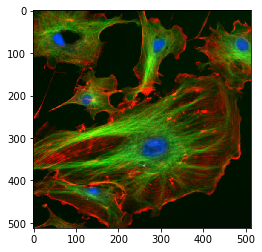

In [7]:
# Create an ImageJ2 gateway with the newest available version of ImageJ2.
import imagej
ij = imagej.init()

# Load an image.
# image_url = 'https://imagej.net/images/clown.jpg'
image_url = './FluorescentCells.jpg'
jimage = ij.io().open(image_url)

# Convert the image from ImageJ2 to xarray, a package that adds
# labeled datasets to numpy (http://xarray.pydata.org/en/stable/).
image = ij.py.from_java(jimage)

# Display the image (backed by matplotlib).
ij.py.show(image, cmap='gray')

# How to initialize PyImageJ

The PyImageJ plugin works by setting up a gateway interface into
[ImageJ2](https://imagej.net/software/imagej2). This gateway interface is
activated using the `imagej.init()` function and yields a wrapped ImageJ2
gateway, the `net.imagej.ImageJ` Java class. This interface has access to all
of the Java-based functions, and also has convenience functions for translating
back and forth between the Python and Java environments.

Setting up this gateway consists of two steps. The first step is to set Java
options. This step is optional, but must be done first because they cannot be
changed after ImageJ2 is initialized. The second step is to specify what
version of ImageJ2 the gateway will represent.

## Quick start

If all you want is the newest version of ImageJ2, with no custom configuration
(e.g., extra memory allocated to Java), use this:

```python
import imagej
ij = imagej.init()
```

It will download and cache ImageJ2, then spin up a gateway for you.

### Configuring the JVM

The ImageJ2 gateway is initialized through a Java Virtual Machine (JVM).
If you want to [configure the
JVM](https://docs.oracle.com/javase/8/docs/technotes/tools/unix/java.html),
it must be done _before_ initializing an ImageJ2 gateway. E.g.:

```python
import imagej
import scyjava
scyjava.config.add_option('-Xmx6g')
ij = imagej.init()
```
See "With more memory available to Java" below for further details.

## Ways to initialize

PyImageJ can be initialized to call:
* different versions of ImageJ2 or component libraries;
* with or without support for the original ImageJ;
* with or without a graphical user interface (GUI); and
* with additional plugins such as Fiji plugins.

All initialization methods except for "local installation" will automatically
include the imagej-legacy endpoint unless the `add_legacy=False` flag is given.

| Requirement                                              | Code                                                                               | Reproducible? |
|:---------------------------------------------------------|:----------------------------------------------------------------------------------:|:-------------:|
| Newest available version of ImageJ2                      | `ij = imagej.init()`                                                               | NO            |
| Newest available version of ImageJ2 (no original ImageJ) | `ij = imagej.init(add_legacy=False)`                                               | NO            |
| Specific version of ImageJ2                              | `ij = imagej.init('2.5.0')`                                                        | YES           |
| Specific version of ImageJ2 (no original ImageJ)         | `ij = imagej.init('2.5.0', add_legacy=False)`                                      | YES           |
| With a GUI (newest version, blocking)                    | `ij = imagej.init(mode='gui')`                                                     | NO            |
| With a GUI (specific version, blocking)                  | `ij = imagej.init('net.imagej:imagej:2.5.0', mode='gui')`                          | YES           |
| With a GUI (newest version, interactive)                 | `ij = imagej.init(mode='interactive')`                                             | NO            |
| With a GUI (specific version, interactive)               | `ij = imagej.init('net.imagej:imagej:2.5.0', mode='interactive')`                  | YES           |
| With Fiji plugins (newest version)                       | `ij = imagej.init('sc.fiji:fiji')`                                                 | NO            |
| With Fiji plugins (specific version)                     | `ij = imagej.init('sc.fiji:fiji:2.5.0')`                                           | YES           |
| With a specific plugin (newest version)                  | `ij = imagej.init(['net.imagej:imagej', 'net.preibisch:BigStitcher'])`             | NO            |
| With a specific plugin (specific version)                | `ij = imagej.init(['net.imagej:imagej:2.5.0', 'net.preibisch:BigStitcher:0.4.1'])` | YES           |
| From a local installation                                | `ij = imagej.init('/Applications/Fiji.app')`                                       | DEPENDS       |

#### Newest available version

If you want to launch the newest available release version of ImageJ2:

```python
import imagej
ij = imagej.init()
```

This invocation will automatically download and cache the newest release of
[net.imagej:imagej](https://maven.scijava.org/#nexus-search;gav~net.imagej~imagej~~~).

#### Explicitly specified version

You can specify a particular version, to facilitate reproducibility:

```python
import imagej
ij = imagej.init('2.5.0')
ij.getVersion()
```

#### With graphical capabilities

There are two ways to show the graphical user interface.

##### GUI mode

```python
import imagej
ij = imagej.init(mode='gui')
```

This mode works on all platforms, but will ***block*** further execution
of your script until the ImageJ user interface shuts down.

_**Note:** For this mode to work on macOS, you will need to install
[PyObjC](https://pyobjc.readthedocs.io/), specifically the `pyobjc-core` and
`pyobjc-framework-cocoa` packages from conda-forge, or `pyobjc` from PyPI._

##### Interactive mode

```python
import imagej
ij = imagej.init(mode='interactive')
ij.ui().showUI() # if you want to display the GUI immediately
```

This mode returns immediately after initializing ImageJ2, allowing you to
"mix and match" operations performed via Python code with operations
performed via GUI interactions.

_**Note:** This mode does not work on macOS,
due to a limitation in the macOS threading model._

#### Support for the original ImageJ

By default, the ImageJ2 gateway includes the
[legacy layer](https://imagej.net/libs/imagej-legacy) for backwards
compatibility with [the original ImageJ](https://imagej.net/software/imagej).
The legacy layer is necessary for macros and any original-ImageJ-based plugins.

If you would rather initialize "pure ImageJ2" without support
for the original ImageJ, you can do so as follows:

```python
import imagej
ij = imagej.init(add_legacy=False)
```

_**Note:** With legacy support enabled in a graphical mode,
the JVM and Python will both terminate when ImageJ closes!_

#### Including Fiji plugins

By default, the ImageJ2 gateway will include base ImageJ2+ImageJ functionality
only, without additional plugins such as those that ship with the
[Fiji](https://fiji.sc/) distribution of ImageJ2.

You can create an ImageJ2 gateway including Fiji plugins as follows:

```python
import imagej
ij = imagej.init('sc.fiji:fiji')
```

or at a reproducible version:

```python
import imagej
ij = imagej.init('sc.fiji:fiji:2.5.0')
```

#### From a local installation

If you have a local installation of ImageJ2, such as [Fiji](https://fiji.sc/),
you can wrap an ImageJ2 gateway around it:

```python
import imagej
ij = imagej.init('/Applications/Fiji.app')
```

Replace `/Applications/Fiji.app` with the path to your installation.

#### With more memory available to Java

Java's virtual machine (the JVM) has a "max heap" value limiting how much
memory it can use. You can increase the value as follows:

```python
import imagej, scyjava
scyjava.config.add_option('-Xmx6g')
ij = imagej.init()
```

Replace `6g` with the amount of memory Java should have. Save some
memory for your core operating system and other programs, though; a good
rule of thumb is to give Java no more than 80% of your physical RAM.

You can also pass
[other JVM arguments](https://docs.oracle.com/javase/8/docs/technotes/tools/unix/java.html).

#### With a specific plugin

For plugins available via Maven, you can specify them in the `init` call. E.g.:

```python
import imagej
ij = imagej.init(['net.imagej:imagej', 'net.preibisch:BigStitcher'])
```

This can be done for the latest versions as above, or at fixed versions like:

```python
import imagej
ij =imagej.init(['net.imagej:imagej:2.5.0', 'net.preibisch:BigStitcher:0.4.1'])
```

#### Plugins without Maven endpoints

For plugins that are published to a Maven repository, it is preferred to
simply add them to the endpoint, rather than using the below approaches.

If you wish to use plugins which are not available as Maven artifacts,
you have a couple of options:

1. Use a local installation of ImageJ2 with the plugins, as described above.
   This is the more recommended approach.

2. Specify a remote version of ImageJ2, but set `plugins.dir` to point to a
   local directory to discover the plugins from there. For example:

   ```python
   import imagej
   import scyjava
   plugins_dir = '/Applications/Fiji.app/plugins'
   scyjava.config.add_option(f'-Dplugins.dir={plugins_dir}')
   ij = imagej.init()
   ```

   Where `plugins_dir` is a path to a folder full of ImageJ plugins.